In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import dask

In [2]:
mobike_par = dd.read_parquet('test.parquet',engine='pyarrow')

In [3]:
mobike_par.head()

d:\Users\great\Anaconda3\envs\py37\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
d:\Users\great\Anaconda3\envs\py37\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
d:\Users\great\Anaconda3\envs\py37\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


,record_id,user_id,bike_id,start_lon,start_lat,end_lon,end_lat,start_id,end_id,start_time,end_time
0,MBK86206238681505730314773,45e985b3dcb859d70a4631fc88d88bd2,8620623868,118.808255,32.052393,118.815084,32.062967,17616,18649,2017-09-18 18:25:35,2017-09-18 19:18:28
1,MBK86203240971505730314611,c2d73ddc923e4c21f857e5841212e849,8620324097,118.733422,31.987824,118.730417,31.992373,10584,10995,2017-09-18 18:25:47,2017-09-18 18:32:08
2,MBK86208648501505730313755,75c79a973762cc855b0a83520455121a,8620864850,118.737325,32.136352,118.739070,32.133887,26241,26036,2017-09-18 18:25:52,2017-09-18 18:30:36
3,MBK86204835351505730309626,844d89f4d8dc7d1cbe6930c12daac9d6,8620483535,118.811291,32.102423,118.840387,32.105020,22973,23190,2017-09-18 18:25:22,2017-09-18 18:41:40
4,MBK02500853931505730256250,f1959964a0dbe802d2bbcffde841ee81,250085393,118.797169,32.048483,118.789400,32.048150,17200,16992,2017-09-18 18:24:36,2017-09-18 18:33:02


In [4]:
mobike = mobike_par.compute()

d:\Users\great\Anaconda3\envs\py37\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
d:\Users\great\Anaconda3\envs\py37\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
d:\Users\great\Anaconda3\envs\py37\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [11]:
mobike[mobike['end_time'] < '2017-09-19'].shape

(582761, 11)

In [12]:
mobike_0918 = mobike[mobike['end_time'] < '2017-09-19']

In [14]:
grouped = mobike_0918.groupby(mobike_0918['bike_id'])

In [15]:
final = grouped.apply(lambda t: t[t.end_time==t.end_time.max()]) # 筛选每组中时间最晚的行

In [18]:
final.shape

(142834, 11)

In [16]:
final.head()

,,record_id,user_id,bike_id,start_lon,start_lat,end_lon,end_lat,start_id,end_id,start_time,end_time
bike_id,,,,,,,,,,,,
0200016316,193734,MBK02000163161505733131324,ad2bc587a11a15d1202b3158d2e8e232,0200016316,118.778353,31.973884,118.776342,31.966380,9160,8335,2017-09-18 19:12:16,2017-09-18 19:20:27
0210065229,241467,MBK02100652291505740689178,9e8d015afff28731f17800dc05985d57,0210065229,118.879767,31.927586,118.887541,31.924144,4460,4258,2017-09-18 21:18:13,2017-09-18 21:24:58
0210275301,184919,MBK02102753011505707678038,c8c514ca3887814b390aeef3e96e9f77,0210275301,118.777107,32.057175,118.781315,32.051858,18016,17401,2017-09-18 12:08:06,2017-09-18 12:14:46
0210275308,221890,MBK02102753081505709660325,85a6bcfa40485805e96f40c81325172b,0210275308,118.799797,32.018707,118.803700,32.026108,13905,14731,2017-09-18 12:41:08,2017-09-18 12:46:35
0210275309,249922,MBK02102753091505741109593,6b2ad0cbc96d7afe1a9ea64dc96457c5,0210275309,118.796953,32.085207,118.797443,32.086702,20908,21114,2017-09-18 21:25:15,2017-09-18 21:28:05


In [17]:
# check if every bike has a final record on 2017-09-18, if it is, should equal to the number of rows in final.
pd.unique(mobike_0918['bike_id']).shape

(142834,)

In [27]:
Parking_distribution = final.groupby('end_id')['record_id'].count()

In [29]:
#save the distribution of bikes where they parked at the end of the day.
Parking_distribution.to_csv('parking_distribuiton.csv',header=True)

## create directed weighted network using all data

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
weight_graph = pd.DataFrame(mobike.groupby(['start_id','end_id'])['record_id'].count())

In [52]:
weight_graph.shape

(714286, 1)

In [62]:
weight_graph.head()

record_id
start_id end_id           
29       29              1
         237             1
         649             1
30       32              1
         648             1

In [61]:
weight_graph_reindex = weight_graph.reset_index()
weight_graph_reindex.head()

,start_id,end_id,record_id
0,29,29,1
1,29,237,1
2,29,649,1
3,30,32,1
4,30,648,1


In [60]:
weight_graph_reindex.sort_values(by='record_id',ascending=False).head()

,start_id,end_id,record_id
114320,7701,7701,1216
160211,9973,9971,970
159959,9971,9973,928
682000,28092,27887,767
118762,7900,8314,757


In [64]:
weight_graph_reindex.rename(index=str, columns={'record_id':'weight'},inplace=True)
weight_graph_reindex.head()

,start_id,end_id,weight
0,29,29,1
1,29,237,1
2,29,649,1
3,30,32,1
4,30,648,1


In [55]:
#weight_graph_reindex.loc[weight_graph_reindex['record_id'].idxmax()]

start_id     7701
end_id       7701
record_id    1216
Name: 114320, dtype: int64

In [69]:
network = nx.from_pandas_edgelist(weight_graph_reindex, 'start_id', 'end_id', ['weight'], create_using=nx.DiGraph)

In [73]:
network.number_of_nodes()

16127

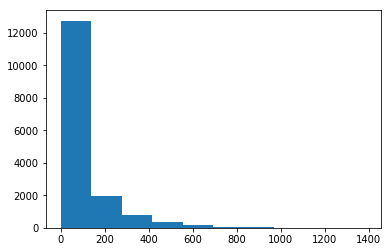

In [76]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(network)

In [99]:
def make_plots(G):
    out_deg_counts = {}
    for node in G.nodes():
        if G.degree(node) not in out_deg_counts.keys():
            out_deg_counts[G.degree(node)] = 0
        out_deg_counts[G.degree(node)] += 1
    x = []
    y = []
    for key in sorted(out_deg_counts.keys()):
        if key == 0 or out_deg_counts[key] == 0:
            continue
        x.append(key)
        y.append(out_deg_counts[key])

    x = np.log10(x)
    y = np.log10(y)
    plt.plot(x, y, linestyle="", marker="o")
    
    coef = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coef)
    y_estimated = polynomial(x)
    plt.plot(x, y_estimated)
    print(coef)
    print("")

[-1.35848891  4.09008366]



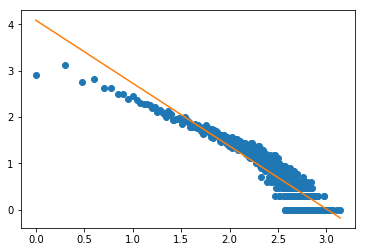

In [100]:
make_plots(network)

In [ ]:
nx.write_weighted_edgelist(network, 'test.weighted.edgelist')